# Introduction

In this post I will comment on the steps in the Machine Learning Process, and show the tools (python libraries and code) used to accomplish each step.

The objective of this post is to have a central place to come and “remember” the ML flow, the tools, and why every step is important.

Below is a flowchart of each step, divided into main categories: Data Analysis and Preparation, Algorithm Selection, Model Training and Model Testing.

<img src="images/flowchart-ml.png">

# Define the Problem and the Objective in a Statement

Before starting the application of Machine Learning, it is necessary to define the problem we are trying to solve and the objective of the project, because the process is huge, making it easy to lose focus. The statement must provide a clear direction of what we are trying to accomplish. A good statement has the scope, the data source, target performance, context usage and how the solution will be created.  


See example below:


**"Use the Machine Learning process to prepare and transform customer data, retrieved from our database of customer deals, to create a prediction model which must predict which client is most likely to decline an offer, in order to offer alternative forms of deals, with an accuracy of 85% or greater."**

# Data Analysis & Preparation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config Completer.use_jedi = False # solves autocompletion Mac: https://github.com/ipython/ipython/issues/10493

This part of the ML process is the one which takes the most time. It usually takes 70% to 80% of the entire process and is a very “manual” process. The sub steps of this part don’t necessarily need to follow the presented sequence.

## Data Inspection

In this step we should inspect the data to get familiarized with it, to check if there are null values, the data types (that generally must be numeric), kinds of values per attribute…

### Commands/Tools

In [ ]:
df = pd.read_csv("./datasets/pima-data-orig.csv")
df.head(5) # check for change
df.shape
df.sample(10) # returns a random sample of items from an axis of object.
df.head(5)
df.tail(5)
df.info() # gives us a quick description of the data
df.describe() # shows the a summary of numerical attributes
df.isnull().values.any() # check for null values
df['num_preg'].value_counts() # to show how many values each category or value - without NAN
df['num_preg'].value_counts(dropna=False) # show nan too
df['num_preg'].unique() # to show distinct values for an attribute
df.nunique() # to show distinct count of values for all tables
df[df.GLUCOSE > 230].count() # count all rows in given one condition
df[(df.GLUCOSE > 1) & (df.GLUCOSE < 3)].count() # count all rows in given two condition
df = df.drop(df[df.score < 50].index) # to remove all rows where column 'score' is < 50:
df.drop(df[df.score < 50].index, inplace=True) # in place version (as pointed out in comments)

### Data Types

In [ ]:
df.dtypes

### Missing - Counting NAN and Null by Column

In [ ]:
df.isna().sum()
df.isnull().sum()

### Duplicates

In [ ]:
df.duplicated()
print(len(duplicated))
df.drop_duplicates()

## Converting Pandas Data Frame Types

In [ ]:
# Will convert all “object” data types into numeric.
columns = df.columns
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')

## Converting Categorical to Python Categorical Type

In [ ]:
df['col_name'] = df['col_name'].astype('category')

## Separating Categorical and Numerical Data for Analysis

### Extracting Categorical Data - Easy Way

In [ ]:
from pandas.api.types import is_string_dtype, is_categorical_dtype, is_numeric_dtype

categorical_vars = []
numerical_vars = []
other_vars = []

for column in df:
    if is_string_dtype(df[column]) or is_categorical_dtype(df[column]):
        categorical_vars.append(column)
    elif is_numeric_dtype(df[column]):
        numerical_vars.append(column)
    else:
        other_vars.append(column)

### Extracting Categorical Data

In [ ]:
df = pd.read_csv("./datasets/dataset2.csv")
categorical_indexes = df.dtypes[df.dtypes == 'object'].index
df[categorical_indexes].describe()

### Extracting Numerical Data

In [ ]:
numerical_indexes = [item for item in list(df.columns) if item not in list(categorical_indexes)]
df[numerical_indexes].describe()

## Data Visualization – Plotting

Another important way to get a feeling of the data is to plot histograms, scatter plots and line plots etc… Matplotlib is the most common plotting library used to accomplish this.

A cheat sheet of how to plot using Matplolib can be accessed here: <a href="http://fernandorodrigues.pro/data-visualization-with-matplotlib-seaborn-pandas-cheat-sheet/">Data Visualization with Matplotlib, Seaborn & Pandas – Cheat Sheet.</a>

## Outliers

### How to Detect

Outliers affect the mean of the data. Detecting and dealing with them is an important part of the Machine Learning Process. An easy way to check outliers is using <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html'>panda’s describe method</a>.

In [ ]:
df = pd.read_csv("./datasets/pima-data-orig.csv")
df.describe()

<img src="images/outliers.png" width="600px" align="left">

By checking the results we can see that skin thickness and insulin are possible outliers, because they are very distant from the average and the standard deviation.

### How to remove

In [ ]:
indexes = np.where(df['skin_thickness']>=40) 
df = df.drop(df.index[indexes])

## Dimensionality Analysis

The objective of this analysis is to find and define a set of optimum attributes, which are relevant for the model and to avoid the curse of dimensionality, which is a phenomenon that reduces the performance of the algorithm after a determined number of attributes. This only occurs in high-dimensional spaces. Motivations for dimensionality reduction are to speed up the training of the algorithm and compression, to save space.

In this step, we can use automated dimensionality analysis algorithms or manually drop attributes that we see add little to no value to the model. It would be useful to create a pipeline to remove irrelevant attributes.

### Commands/Tools

In [ ]:
# manually removing unneeded attribute columns
# axis=1 is for column removal
df = df.drop(['unneeded_attribute1', 'unneeded_attribute2', 'unneeded_attribute3'], axis=1) 

## Converting Categorial/Qualitative values into Numbers

Most machine learning algorithms prefer to work with numbers, so data values like F (for female), M (male), should be converted to numbers. If we don’t do this explicitly, scikit-learn will internally cast those values into unknown float values. For when you have up to three classes for an attribute, its ok to use label encoding. But when theres more classes, its is recomended using One Hot Encoding, to prevent the model infering some kind of relationship on data.

### Label Encoding

Label Encoding is better used when having at maximum 3 values for an attribute. More than 3 it is recommended to use One Hot Encoding.

In [ ]:
df = pd.read_csv('datasets/custos_seguro.csv')

# using Scikit
from sklearn.preprocessing import LabelEncoder
df_encoded = df.apply(LabelEncoder().fit_transform)

# or using Pandas Cat Codes
df['sexo'] = df['sexo'].astype('category') 
df['sexo'] = df['sexo'].cat.codes

# or using mapping
value_map = { "masculino": 1, "feminino": 0 }
df['sexo'] = df['sexo'].map(value_map)

### One-Hot encoding with Scikit-learn

In [ ]:
df = pd.read_csv("./datasets/dataset2.csv")

# will return the dataframe with columns encoded and renamed with tipo_residencia_Rural, tipo_residencia_Urbana
encoded_df = pd.get_dummies(df, columns=['tipo_residencia']) 

## Missing Analysis

Along with actual clear missing values, it is possible to have some hidden missing values in the dataset; this is bad because most Machine Learning algorithms can’t process missing values. Some systems add a zero (0) instead of null when the data is not available, or even leave the data blank, so a good question is: Is this value possible? Is it really a 0 (in this case) or blank or something else?

For Categorical Data at least four approaches can be used: Label Encoding (up to 3 attributes),  One-Hot Encoding (for any number or more than 3 attributes) Remove the line/observation or Remove the Attribute. The decision is up to the Data Scientist. As a general rule i would do the maximum to retain as maximum info as possible. If there are a small number of observations with missing, i could also remove it.

For Numerical Data at least five approaches can be used: Input missing with mean, median or other statistical method, Remove the line/observation or Remove the Attribute.

### Inspecting Categorical

In [ ]:
categorical_indexes = df.dtypes[df.dtypes == 'object'].index 
df[categorical_indexes].describe()

<img src="images/missing.png" width="500" align="left">

### Inspecting Numerical

In [ ]:
numerical_indexes = [item for item in list(df.columns) if item not in list(categorical_indexes)]
df[numerical_indexes].describe()

<img src="images/missing2.png" width="700" align="left">

### Other Inspection commands

Counting missing by column

In [ ]:
df.isnull().sum() # the number of missing data points per column

### Creating new status for a missing Attribute

Sometimes when you have an attribute with lots of missing values that will make you loose info, it is possible to create a new attribute like Unknown.

In [ ]:
new_status = np.where(df['status_tabagismo'].isnull(), "unknown", df['status_tabagismo'])
df['status_tabagismo'] = new_status

df['status_tabagismo'].unique()

In [ ]:
missing_values_count = df.isnull().sum() # the number of missing data points per column
print(missing_values_count)

### Dealing with Numerical/Quantitative values

#### Check Data Distribution

This is an important step because it only makes sense to input the mean if there is a central tendency is the data.

In [ ]:
df.hist(column = 'imc', figsize=(9,6), bins=20)

We can see that the data is concentrated in 20 and 40, so it can make sense to input the mean.

#### Fill missing

Using **Pandas's mean** of the column

In [ ]:
df = df['column'].fillna(df['column'].mean()) # using the mean of the column

With the mean/median using the **Scikit's Imputer class**

In [ ]:
from sklearn.preprocessing import Imputer
 
#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
 
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

With 0s and **Panda’s fillna**

In [ ]:
# replace all NA's with 0
subset_nfl_data.fillna(0) 

Replace all NA's the value that comes directly after it in the same column, (This makes a lot of sense for datasets where the observations have some sort of logical order to them.) then replace all the reamining na's with 0

In [ ]:
df_subset.fillna(method = 'bfill', axis=0).fillna(0)

#### Removing Lines/Observations

Remove observation with  missing values

In [ ]:
df.dropna() # will delete the ROW if any attribute have missing
df.dropna(subset=["some_column"]) # deletes if it finds a missing on a specific subset

Remove observation if All attributes are 0

In [ ]:
df = df.loc[~(df==0).all(axis=1)]

Remove observation if Any of attributes are 0

In [ ]:
df = df.loc[~(df==0).any(axis=1)]

Removing lines conditionally

In [ ]:
df[(df.GLUCOSE > 1) & (df.GLUCOSE < 3)].count() # count all rows in given two condition
df = df.drop(df[df.score < 50].index) # to remove all rows where column 'score' is < 50:
df.drop(df[df.score < 50].index, inplace=True) # in place version (as pointed out in comments)

#### Removing Columns/Attributes

In [ ]:
# delete the entire attribute column
data_frame.drop("some_column", axis=1)

## Correlation and Association Analysis

Correlation is a concept that can be translated to a number that measure the strenght of the linear association of two quantitative variables. This is a very important part of the analysis. For numerical variables or categorical up to 2 classes, Pearson's correlation numbers can be used. For categorical with more than 2 values, Association should be used, because Pearson's correlation can't be trusted for more than 3 classes. 



As técnicas para analisar a relação entre variáveis são:


Categórica x Categórica -> **Qui-Quadrado**

Numérica x Numérica -> **Regressão Linear**

Categórica (Dependente) x Numérica (Independente) -> **Regressão Logística**

Categórica (Independente) x Numérica (Dependente) -> **ANOVA**


### Correlation (Numerical and Categorical up to 2 Classes)

Correlation can be positive or negative. Positive correlation mean that if one variable increases, the other increases as well. Negative correlation mean that if one increases the other decreases.

In [4]:
df = pd.read_csv('datasets/pima-data-orig.csv')

df.corr()

num_preg  glucose_conc  diastolic_bp  skin_thickness  \
num_preg        1.000000      0.129459      0.141282       -0.081672   
glucose_conc    0.129459      1.000000      0.152590        0.057328   
diastolic_bp    0.141282      0.152590      1.000000        0.207371   
skin_thickness -0.081672      0.057328      0.207371        1.000000   
insulin        -0.073535      0.331357      0.088933        0.436783   
bmi             0.017683      0.221071      0.281805        0.392573   
diab_pred      -0.033523      0.137337      0.041265        0.183928   
age             0.544341      0.263514      0.239528       -0.113970   
diabetes        0.221898      0.466581      0.065068        0.074752   

                 insulin       bmi  diab_pred       age  diabetes  
num_preg       -0.073535  0.017683  -0.033523  0.544341  0.221898  
glucose_conc    0.331357  0.221071   0.137337  0.263514  0.466581  
diastolic_bp    0.088933  0.281805   0.041265  0.239528  0.065068  
skin_thickness  0.436783  0.392573   0.183928 -0.113970  0.074752  
insulin         1.000000  0.197859   0.185071 -0.042163  0.130548  
bmi             0.197859  1.000000   0.140647  0.036242  0.292695  
diab_pred       0.185071  0.140647   1.000000  0.033561  0.173844  
age            -0.042163  0.036242   0.033561  1.000000  0.238356  
diabetes        0.130548  0.292695   0.173844  0.238356  1.000000

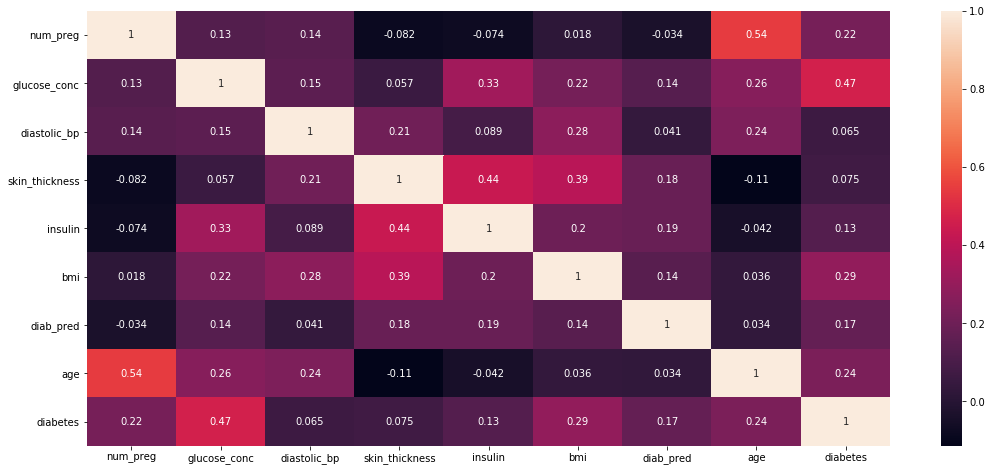

In [5]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
del df['some_column'] # to remove a single correlated column

### Association (Categorical > 2 Classes)

In [ ]:
df = pd.read_csv('datasets/pacientes.csv')

df['sex'] = df['sex'].astype('category')
df['education'] = df['education'].astype('category')
df['currentSmoker'] = df['currentSmoker'].astype('category')
df['BPMeds'] = df['BPMeds'].astype('category')
df['prevalentStroke'] = df['prevalentStroke'].astype('category')
df['prevalentHyp'] = df['prevalentHyp'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['TenYearCHD'] = df['TenYearCHD'].astype('category')

In [ ]:
import scipy.stats as ss

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Em Estatística, Cramér-V é uma medida de associação entre duas variáveis categóricas, fornecendo um valor 
# entre 0 e +1 (inclusive). É baseado na estatística do qui-quadrado (chi2) de Pearson e foi publicado 
# por Harald Cramér em 1946. 

# A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

categorical_vars = []

for column in df:
    if is_string_dtype(df[column]):
        categorical_vars.append(column)
        
        
y = 'TenYearCHD'

print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(df[var], df[y]))

**Interpretação:**

A maioria das variáveis categóricas não são significativas para explicar a variável de saída. Isso porque estão muito próximas de 0. A variável prevalentHyp mostra relevância, e a TenYearCHD está bem próxima de 1 porque é totalmente associada com ela mesma.

## Imbalanced Target Class

### Oversampling / Data Augmentation

#### SMOTE

SMOTE (Synthetic Minority Oversampling Technique)¶
SMOTE é um tipo de Dataset Augmentation.

Um problema com a classe desequilibrada é que existem poucos exemplos da classe minoritária para um modelo aprender efetivamente o limite da decisão.

Uma maneira de resolver esse problema é exagerar os exemplos na classe minoritária. Isso pode ser conseguido simplesmente duplicando exemplos da classe minoritária no conjunto de dados de treinamento antes de ajustar um modelo. Isso pode equilibrar a distribuição de classe, mas não fornece nenhuma informação adicional ao modelo.

Uma melhoria na duplicação de exemplos da classe minoritária é sintetizar novos exemplos da classe minoritária. Este é um tipo de aumento de dados para dados tabulares e pode ser muito eficaz.

Talvez a abordagem mais amplamente usada para sintetizar novos exemplos seja chamada Synthetic Minority Oversampling Technique, ou SMOTE, resumidamente. Essa técnica foi descrita por Nitesh Chawla, et al. em seu trabalho de 2002, nomeado para a técnica intitulada "SMOTE: Técnica de sobre-amostragem de minorias sintéticas".

https://arxiv.org/abs/1106.1813

O SMOTE funciona selecionando exemplos que estão próximos no espaço de recurso, desenhando uma linha entre os exemplos no espaço de recurso e desenhando uma nova amostra em um ponto ao longo dessa linha.

Especificamente, um exemplo aleatório da classe minoritária é escolhido primeiro. Em seguida, k dos vizinhos mais próximos desse exemplo é encontrado (normalmente k = 5). Um vizinho selecionado aleatoriamente é escolhido e um exemplo sintético é criado em um ponto selecionado aleatoriamente entre os dois exemplos no espaço de recurso.

O SMOTE primeiro seleciona uma instância de classe minoritária A aleatoriamente e encontra seus k vizinhos de classe minoritária mais próximos. A instância sintética é criada escolhendo um dos k vizinhos mais próximos B aleatoriamente e conectando A e B para formar um segmento de linha no espaço de recursos. As instâncias sintéticas são geradas como uma combinação convexa das duas instâncias escolhidas A e B.

In [ ]:
# pip install imblearn
from imblearn.over_sampling import SMOTE

X = df.iloc[:, 0:14]  
y = df.iloc[:, -1] 

smote_bal = SMOTE(random_state = 100)

X_res, y_res = smote_bal.fit_resample(X, y)

### Undersampling

In [ ]:
# Not recommended rsrs

## Scaling, Standardization, Normalization and Binarization

Muitos algoritmos de modelagem fazem suposições sobre os dados e geralmente é uma boa ideia preparar os dados para melhor expor a estrutura do problema aos algoritmos que você pretende usar, sendo esta uma parte importante da etapa de pré-processamento de dados, quando trabalhamos com Data Science. Você  quase  sempre  precisa  pré-processar  seus  dados.  

É  um  passo praticamente obrigatório. Uma dificuldade é que algoritmos diferentes fazem suposições diferentes sobre os dados e podem exigir transformações diferentes. Além disso, quando você segue todas as regras e prepara seus dados, às vezes os algoritmos podem oferecer melhores resultados sem o pré-processamento. Não há fórmulas mágicas, pois tudo depende dos dados e os dados sempre mudam.

Geralmente, recomendamos a criação de muitos modos de exibição e transformações diferentes dos dados e, em seguida, exercitar um punhado de algoritmos em cada bloco do seu conjunto de dados. Isso ajudará você a identificar quais transformações de dados podem ser melhores para expor a estrutura do problema em geral. Vamos listar agora as 4 diferentes técnicas de pré-processamento de dados para aprendizado de máquina, pois esta é uma das maiores dúvidas de quem começa em Data Science.

1. Aplicar **Escala** aos dados

Quando  seus  dados  são  compostos  de atributos  com  escalas  variáveis,  muitos algoritmos de aprendizado de máquina podem se beneficiar do reescalonamento dos atributos para que todos tenham a mesma escala. Muitas vezes isso é conhecido como normalização (embora não seja o termo ideal) e os atributos  são  frequentemente  redimensionados  no  intervalo  entre  0  e  1.  Isso  é  útil  para algoritmos de otimização usados no núcleo de algoritmos de aprendizado de máquina como o gradiente descendente. Também é útil para algoritmos que pesam entradas como regressão e redes neurais e algoritmos que usam medidas de distância como K-Nearest Neighbors(KNN).

2. **Padronização** dos Dados

A padronização é uma técnica útil para transformar atributos com uma distribuição gaussiana e diferentes médias e desvios padrão para uma distribuição Gaussiana padrão com uma média de 0 e um desvio padrão de 1. É  mais  adequado  para  técnicas  que  pressupõem  uma  distribuição  gaussiana  nas variáveis de entrada e funcionam melhor com dados reescalonados, como regressão linear, regressão logística e análise discriminante linear.

3. **Normalização** dos Dados

A normalização refere-se ao reescalonamento para ter um comprimento de 1 (chamado de norma unitária em álgebra linear). Esse pré-processamento pode ser útil para conjuntos de dados esparsos (muitos zeros) com atributos de escalas variadas ao usar algoritmos que ponderam valores de entrada, como redes neurais e algoritmos que usam medidas de distância, como K-Nearest Neighbors (KNN).

4. **Binarização** dos Dados

Você pode transformar seus dados usando um limite binário. Todos os valores acima do limite são marcados como 1 e todos iguais ou inferiores são marcados como 0. Isso é chamado de binarizar seus dados ou limitar seus dados. Pode ser útil quando você tem  probabilidades  que  você  deseja tornar valores  nítidos para  leitura  e  interpretação. Também é útil quando na engenharia de recursos adicionamos novos recursos que indicam algo significativo.



**Scaling vs. Normalization: What’s the difference?**

One of the reasons that it’s easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you’re transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you’re changing the *range* of your data while in normalization you’re changing the *shape of the distribution* of your data. Let’s talk a little more in-depth about each of these options.

There are two common ways to make all attributes to have the same scale: min-max scaling and standardization/normalization.

Feature Scaling is one of the most important transformations to apply in the data. With few exceptions ML algorithms don’t perform well with numerical values with different scales. In the scaling process, the data is transformed to fit within a scale, for example 0-1 or 0-100. By doing this, algorithms like SVM, KNN, which use measures on how far apart are the data points, can compare variables with the same footing. Scaling does not change the shape of the data.

In [ ]:
# # with MLXEND
# from mlxtend.preprocessing import minmax_scaling # for min_max scaling
# scaled_data = minmax_scaling(df, columns = ['diastolic_bp']) # mix-max scale the data between 0 and 1 # ERROR

**Normalization** is a more radical transformation, it changes the shape of the distribution of the data. The objective of it to make the data became a normal distribution, aka. bell curve, bell shape or gaussian distribution. In general the data must be normalized when an algorithm or technique assumes the data is normalized, is normally distributed. Tip: any method with Gaussian in the name probably assumes normality. Some examples include: ANOVAs, Linear Regression, LDA and Gaussian Naive Bayes.

In [ ]:
# with Scipy
from scipy import stats # for Box-Cox Transformation
normalized_data = stats.boxcox(df) # normalize the exponential data with boxcox

In [ ]:
# with Scikit-Learn 
from sklearn.preprocessing import StandardScaler # very useful for using with Pipelines 

y = df['diabetes']
X = df.drop(['diabetes'], axis=1)


scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)

## Split the Dataset

### In Training and Testing

In [ ]:
# splitting the data: 70% for training and 30% for testing

from sklearn.model_selection import train_test_split
 
# Manually
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
data_frame_train_labels = train_set["diabetes"].copy()
data_frame_train = train_set.drop("diabetes", axis=1) # drop labels for training set
data_frame_test_labels = test_set["diabetes"].copy()
data_frame_test = test_set.drop("diabetes", axis=1) # drop labels for training set
 
# Semi Manually - X and y must be separated manually - use this one
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# checking the division

print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

### In Training, Testing and Validation

In [ ]:
# Esta função calcula a prevalência da classe positiva (label = 1)
def calcula_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)

In [ ]:
# Gerando amostras aleatórias dos dados
df_data = df.sample(n = len(df))
 
# Ajustando os índices do dataset
df_data = df_data.reset_index(drop = True)
 
# Gera um índice para a divisão
df_valid_teste = df_data.sample(frac = 0.3)
print("Tamanho da divisão de validação / teste: %.1f" % (len(df_valid_teste) / len(df_data)))
 
# Fazendo a divisão
# Dados de teste
df_teste = df_valid_teste.sample(frac = 0.5)
 
# Dados se validação
df_valid = df_valid_teste.drop(df_teste.index)
 
# Dados de treino
df_treino = df_data.drop(df_valid_teste.index)
 
# Verifique a prevalência de cada subconjunto
print("Teste(n = %d): %.3f" % (len(df_teste), calcula_prevalencia(df_teste.diabetes.values)))
print("Validação(n = %d): %.3f" % (len(df_valid), calcula_prevalencia(df_valid.diabetes.values)))
print("Treino(n = %d): %.3f" % (len(df_treino), calcula_prevalencia(df_treino.diabetes.values)))

# Feature Selection / Dimensionality Reduction

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

* <strong>Reduces Overfitting</strong>: Less redundant data means less opportunity to make decisions based on noise.
* <strong>Improves Accuracy</strong>: Less misleading data means modeling accuracy improves.
* <strong>Reduces Training Time</strong>: Less data means that algorithms train faster.

## *Recursive Feature Elimination Cross Validation - Classification

Especialista IA para a Área da Saúde > Machine Learning para Medicina > Interpretabilidade de Modelos de Machine Learning Parte 1

In [40]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv('datasets/cervix_cancer_clean.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

X = df.drop('Biopsy', axis = 1)
y = df['Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

# Creating and fitting the Selector
selector_f1 = RFECV(estimator = RandomForestClassifier(random_state = 101), step = 1, cv = StratifiedKFold(10), scoring = 'f1')
selector_f1 = seletor_f1.fit(X_train_scaled, y_train)

print('Número Ideal de Atributos: {}'.format(seletor_f1.n_features_))

preds_selector_f1 = selector_f1.predict(X_test_scaled)

acc_selector_f1 = accuracy_score(y_test, preds_selector_f1)
print('Accurary', acc_selector_f1)

Número Ideal de Atributos: 9
Accurary 0.9244186046511628


In [41]:
selector_f1.estimator_.feature_importances_ # Notice the estimator_ attribute access here

array([0.21969324, 0.10778584, 0.13989109, 0.09767803, 0.06584315,
       0.16449946, 0.05090046, 0.04335038, 0.11035835])

In [42]:
selector_f1.support_ # shows the most important features that the model has chosen

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

In [43]:
# Creates a Dataframe with the results
result_selector_f1 = pd.DataFrame()
result_selector_f1['Attribute'] = X_train.columns[np.where(selector_f1.support_ == True)]
result_selector_f1['Score'] = selector_f1.estimator_.feature_importances_
result_selector_f1.sort_values('Score', inplace = True, ascending = True)

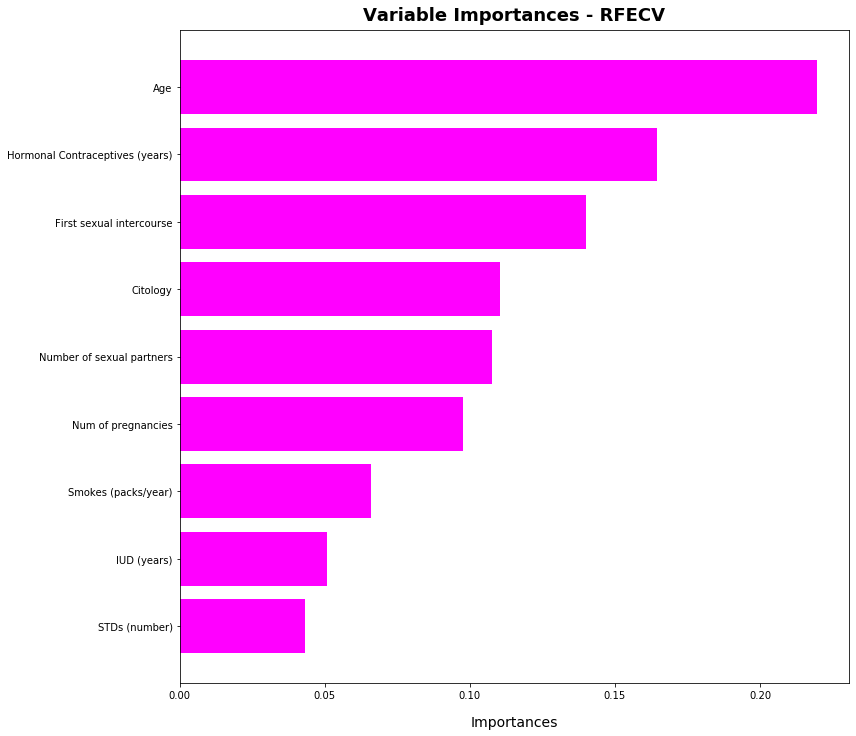

In [44]:
# Plot 
plt.figure(figsize = (12, 12))
plt.barh(y = result_selector_f1['Attribute'], width = result_selector_f1['Score'], color = 'Magenta')
plt.title('Variable Importances - RFECV', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Importances', fontsize = 14, labelpad = 15)
plt.show()

## Recursive Feature Elimination - Classification

## PCA

A análise de componentes principais é uma técnica para a extração de recursos -para combinar  nossas  variáveis de  entrada  de  uma  maneira  específica,  podemos  eliminar  as variáveis “menos importantes”, mantendo as partes mais valiosas de todas as variáveis! Como um benefício adicional, cada uma das "novas" variáveis após o PCA é independente uma da outra. Isso é um benefício, porque as suposições de um modelo linear exigem que nossas variáveis independentes sejam independentesuma da outra. Se decidirmos ajustar um modelo de regressão linear com essas "novas" variáveis, essa suposição será necessariamente satisfeita.

## Feature Importances

Acording to Daniel from DSA Random Forest is always a very good algorithm to check feature importances.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(n_estimators=200)

x = df.drop(columns=['diabetes'])
y = df.diabetes

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=1)

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
score = np.round(rf.feature_importances_,3)
importances = pd.DataFrame({'feature':df.columns[:-1],'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

## Univariate Selection - SelectKBest

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Many different statistical test scan be used with this selection method. For example the ANOVA F-value method is appropriate for numerical inputs and categorical data, as we see in the Pima dataset. This can be used via the f_classif() function. We will select the 4 best features using this method in the example below.

In [ ]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

# Spliting the Dataset / Cross Validation

## Train Test Split

Spliting a dataset in train and test is cross validation. It is a simple and less processing power consuming. It seems ideal for fast validation.

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['diabetes'])
y = df.diabetes

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=1)

## K Folds

It is another technique for validation that uses k folds to train and validate the data. It has a tendency of yielding worst results thans train test split, but it is more reliable. Some people do this on Hyperparameter Tunning, because there K Folds cross validation is already used.


<img src="images/kfolds.png" width="400px" />

In [ ]:
from sklearn.model_selection import cross_validate

def cross_validate_model(model, x, y):
    results = cross_validate(model, x, y, scoring=['accuracy', 'roc_auc', 'precision', 'recall', 'f1'], cv=5)
    print('Acuracy in test', np.mean(results['test_accuracy']))
    print('Roc AUC in test', np.mean(results['test_roc_auc']))
    print('Precision in test', np.mean(results['test_precision']))
    print('Recall in test', np.mean(results['test_recall']))
    print('F1 in test', np.mean(results['test_f1']))
    print()
    
models = [RandomForestClassifier(n_estimators=150), KNeighborsClassifier()]

for model in models:
    cross_validate_model(model, x, y)

# Algorithm Selection

A good way to choose an algorithm, is based on the task: classification, regression, clustering, anomaly detection or dimensionality reduction. Here are some cheat sheets to help on that.

<img src="images/ml_map_sklearn.png">

<img src="images/azure-ml.jpg">

<img src="images/azure-ml-2.png"> 

# Scoring Table

In [6]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score

# define the dataframe
scores_table = pd.DataFrame(columns=['Model', 'HyperParameters', 'RocAUCScore', 'Accuracy', 'Precision 0', 'Precision 1', 'Recall 0', 'Recall 1', 'ConfusionMatrix', 'CommentsAndObservations'])

# reusable function
def compute_scores(model_name, hyperparameters, y_true, y_pred, comments_and_observations):
    return {
            'Model': model_name, 
            'HyperParameters': hyperparameters, 
            'RocAUCScore': "%.2f" % roc_auc_score(y_true, y_pred), 
            'Accuracy': "%.2f" % accuracy_score(y_true, y_pred), 
            'Precision 0': "%.2f" % precision_score(y_true, y_pred, pos_label=0), 
            'Precision 1': "%.2f" % precision_score(y_true, y_pred, pos_label=1),
            'Recall 0': "%.2f" % recall_score(y_true, y_pred, pos_label=0),
            'Recall 1': "%.2f" % recall_score(y_true, y_pred, pos_label=1),
            'ConfusionMatrix': confusion_matrix(y_true, y_pred), 
            'CommentsAndObservations': comments_and_observations
    }


In [ ]:
# append into the dataframe
scores_table = scores_table.append(compute_scores('RandomForestClassifier', 'n_estimators=20, random_state=42', y_train, pred_train, 'Train - Using the raw imbalanced dataset'), ignore_index=True)

<img src="images/scores_table.png" width="1000">

# Train the Model

In [ ]:
# training with NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
 
nb_model.fit(df_train_transformed, df_train_labels)

In [ ]:
# training with RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # Create random forest object
 
rf_model.fit(df_train_transformed, df_train_labels)

In [ ]:
# training with LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state=42)
 
lr_model.fit(df_train_transformed, df_train_labels)

# Test the Model

## Check the performance of selected model

In [ ]:
from sklearn import metrics
 
# predict values on TRAINING data
nb_predict_train = nb_model.predict(df_train_transformed)
 
print("Accuracy on training: {0:.4f}".format(metrics.accuracy_score(df_train_labels, nb_predict_train)))
 
# predict values on TEST data
test_set_transformed = full_pipeline.fit_transform(test_set) # assuming the data is being transformed via pipeline
nb_predict_test = nb_model.predict(test_set_transformed)
 
print("Accuracy on test: {0:.4f}".format(metrics.accuracy_score(df_test_labels, nb_predict_test)))

In [ ]:
# performance analysis for RANDOM FOREST
from sklearn import metrics
 
# predict values on TRAINING data
rf_predict_train = rf_model.predict(df_train_transformed)
 
print("Accuracy on training: {0:.4f}".format(metrics.accuracy_score(df_train_labels, rf_predict_train)))
 
# predict values on TEST data
test_set_transformed = full_pipeline.fit_transform(test_set) # assuming the data is being transformed via pipeline
rf_predict_test = rf_model.predict(test_set_transformed)
 
print("Accuracy os test: {0:.4f}".format(metrics.accuracy_score(df_test_labels, rf_predict_test)))

In [ ]:
# performance analysis for LOGISTIC REGRESSION
from sklearn import metrics
 
# predict values on TRAINING data
lr_predict_train = lr_model.predict(df_train_transformed)
 
print("Accuracy on train: {0:.4f}".format(metrics.accuracy_score(df_train_labels, lr_predict_train)))
 
# predict values on TEST data
test_set_transformed = full_pipeline.fit_transform(test_set) # assuming the data is being transformed via pipeline
lr_predict_test = lr_model.predict(test_set_transformed)
 
print("Accuracy on test: {0:.4f}".format(metrics.accuracy_score(df_test_labels, lr_predict_test)))

# Powerful Models

## Random Forest Classifier

### Cross Validation with Train Test Split

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc.fit(x_train, y_train)

pred_train = rfc.predict(x_train)
pred_test = rfc.predict(x_test)

# adding to scores_table dataframe
df_results = df_results.append(compute_scores('RandomForestClassifier', 'n_estimators=20, random_state=42', y_train, pred_train, 'Train - Using the raw imbalanced dataset'), ignore_index=True)

### Cross Validation with KFolds

In [ ]:
from sklearn.model_selection import cross_validate

def cross_validate_model(model, x, y):
    results = cross_validate(model, x, y, scoring=['accuracy', 'roc_auc', 'precision', 'recall'], cv=5, return_estimator=True)
    estimator = results['estimator'][0]
    return estimator

In [ ]:
estimator = cross_validate_model(RandomForestClassifier(n_estimators=20, random_state=42), x, y)
y_pred = estimator.predict(x)

scores_table = pd.DataFrame(columns=['Model', 'HyperParameters', 'RocAUCScore', 'Accuracy', 'Precision 0', 'Precision 1', 'Recall 0', 'Recall 1', 'ConfusionMatrix', 'CommentsAndObservations'])

## XGBoost Classifier

### Cross Validation with Train Test Split

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=x_train.columns)
dtest = xgb.DMatrix(x_test)

param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
pred_test = [round(value) for value in bst.predict(dtest)]
predictions = [round(value) for value in pred_test]

scores_table = scores_table.append(compute_scores('XGBoost', "'max_depth':2, 'eta':1, 'objective':'binary:logistic'", y_test, predictions, 'Test Inbalanced'), ignore_index=True)

### Cross Validation with KFolds

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
estimator = cross_validate_model(model, x, y)
y_pred = estimator.predict(x)

scores_table = scores_table.append(compute_scores('XGBoost', "'max_depth':2, 'eta':1, 'objective':'binary:logistic'", y, y_pred, 'Test Balanced'), ignore_index=True)

## Deep Learning

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

nn = Sequential()
nn.add(Dense(128, input_dim = x_train.shape[1], activation = 'relu'))
nn.add(Dropout(0.5))
nn.add(Dense(128, activation = 'relu'))
nn.add(Dropout(0.5))
nn.add(Dense(1, activation = 'sigmoid'))
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = nn.fit(x_train, y_train, epochs = 1000, batch_size = 128, verbose = 1, validation_split = 0.1)

In [ ]:
pred_test = nn.predict_classes(x_test)

scores_table = scores_table.append(compute_scores('Deep Learning', "dense 128, dropout .5, dense 128, dropount .0 dense sigmoid", y_test, pred_test, 'Neural Network'), ignore_index=True)

In [ ]:
nn.summary()

The accuracy can be deceiving, for example imagine a dataset (skewed, distorted) which as 90% of one class, true for example, and 10% of falses, if you guess that all data is true your accuracy will be 90% correct. For this reason you should have in hand the Confusion Matrix and the Classification Report, which gives a whole set of metrics to analyze.

# Hyperparameter Optimization

## Grid Search

Is faster than Random search, and presents slight less improvements.

### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

pesos_classes = {0:0.47, 1:0.53}

rf = RandomForestClassifier(random_state = 42, 
                            class_weight = pesos_classes, 
                            n_estimators = 100, 
                            min_samples_split = 10)

gridparam_rf = {'n_estimators': [100, 200, 500], 'min_samples_split': [5,10,15],}

rf_gs = GridSearchCV(rf, cv = 3, param_grid = gridparam_rf)
rf_gs(X_treino_scaled_bal, Y_treino_bal)

print('Model`s best params: ', rf_gs.best_params_)

rf_Y_pred = rf_gs.predict(X_teste_scaled)
rf_predict_proba = rf_gs.predict_proba(X_teste_scaled)[:,1] 

### AdaBoost 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state = 123)

gridparam_ab = {'n_estimators': [100,200,500], 'learning_rate': [0.2,0.5,1.0],}

ab_gs = GridSearchCV(ab, cv = 3, param_grid = gridparam_ab)
ab_gs.fit(X_treino_scaled_bal, Y_treino_bal)

print('Model`s best params: ', ab_gs.best_params_)

ab_Y_pred = ab_gs.predict(X_teste_scaled)
ab_predict_proba = ab_gs.predict_proba(X_teste_scaled)[:,1] 

## Random Search

Slower than Grid Search but, generaly, presents slightly better results.

# Metric’s Analysis

## Regression Metrics

### MAE - Mean Absolute Error

This is one of the most popular metrics for regression.

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

### MSE - Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

### RMSE - Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

### R2 Score

Aka Determination coeficient.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# Auto ML

## H2O

In [ ]:
# pip install -q -U h2o

In [3]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

h2o.init()

dados = pd.read_csv("datasets/diabetic_data.csv")

dados['readmitted'] = dados['readmitted'].replace('>30', int(1))
dados['readmitted'] = dados['readmitted'].replace('<30', int(1))
dados['readmitted'] = dados['readmitted'].replace('NO', int(0))

dados_h2o_1 = h2o.H2OFrame(dados)

print(type(dados_h2o_1))
print(dados_h2o_1.head())
print(dados_h2o_1.describe())

# Como a variável y foi definida como tipo int, o H2O vai executar o treinamento como se fosse problema de regressão
# Precisamos converter para o tipo factor
dados_h2o_1['readmitted'] = dados_h2o_1['readmitted'].asfactor()

print(dados_h2o_1.describe())

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         5 mins 48 secs
H2O_cluster_timezone:       America/Sao_Paulo
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.0.3
H2O_cluster_version_age:    17 days
H2O_cluster_name:           H2O_from_python_fernandorodrigues_ppnlh5
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.546 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.6.1 final
--------------------------  ------------------------------------------------------------------

Parse progress: |█████████████████████████████████████████████████████████| 100%
<class 'h2o.frame.H2OFrame'>


encounter_id patient_nbr race gender age weight admission_type_id discharge_disposition_id admission_source_id time_in_hospital payer_code medical_specialty num_lab_procedures num_procedures num_medications number_outpatient number_emergency number_inpatient diag_1 diag_2 diag_3 number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted 
 
 
 2.27839e+06 8.22216e+06 Caucasian Female [0-10) ? 6 25 1 1 ? Pediatrics-Endocrinology 41 0 1 0 0 0 250.83 nan nan 1 None None No No No No No No No No No No No No No No No No No No No No No No No No No 0 
 149190 5.56292e+07 Caucasian Female [10-20) ? 1 1 7 3 ? ? 59 0 18 0 0 0 276 250.01 255 9 None None No No No No No No No No No No No No No No No No No Up No No No No No Ch Yes 1 
 64410 8.60479e+07 AfricanAmerican Female [20-30) ? 1 1 7 2 ? ? 11 5 13 2 0 1 648 250 nan 6 None None No No No No No No Steady No No No No No No No No No No No No No No No No No Yes 0 
 500364 8.24424e+07 Caucasian Male [30-40) ? 1 1 7 2 ? ? 44 1 16 0 0 0 8 250.43 403 7 None None No No No No No No No No No No No No No No No No No Up No No No No No Ch Yes 0 
 16680 4.25193e+07 Caucasian Male [40-50) ? 1 1 7 1 ? ? 51 0 8 0 0 0 197 157 250 5 None None No No No No No No Steady No No No No No No No No No No Steady No No No No No Ch Yes 0 
 35754 8.26375e+07 Caucasian Male [50-60) ? 2 1 2 3 ? ? 31 6 16 0 0 0 414 411 250 9 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes 1 
 55842 8.42598e+07 Caucasian Male [60-70) ? 3 1 2 4 ? ? 70 1 21 0 0 0 414 411 nan 7 None None Steady No No No Steady No No No No No No No No No No No No Steady No No No No No Ch Yes 0 
 63768 1.14883e+08 Caucasian Male [70-80) ? 1 1 7 5 ? ? 73 0 12 0 0 0 428 492 250 8 None None No No No No No No No Steady No No No No No No No No No No No No No No No No Yes 1 
 12522 4.83308e+07 Caucasian Female [80-90) ? 2 1 4 13 ? ? 68 2 28 0 0 0 398 427 38 8 None None No No No No No No Steady No No No No No No No No No No Steady No No No No No Ch Yes 0 
 15738 6.35559e+07 Caucasian Female [90-100) ? 3 3 4 12 ? InternalMedicine 33 3 18 0 0 0 434 198 486 8 None None No No No No No No No No No No Steady No No No No No No Steady No No No No No Ch Yes 0


Rows:101766
Cols:50




encounter_id patient_nbr race gender age weight admission_type_id discharge_disposition_id admission_source_id time_in_hospital payer_code medical_specialty num_lab_procedures num_procedures num_medications number_outpatient number_emergency number_inpatient diag_1 diag_2 diag_3 number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted 
 
 
 type int int enum enum enum enum int int int int enum enum int int int int int int real real real int enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum int 
 mins 12522.0 135.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 3.0 5.0 3.0 1.0 0.0 
 mean 165201645.62297827 54330400.69494735 2.0240060531022137 3.7156417664052777 5.754436648782503 4.395986871843248 43.09564098028813 1.3397303618104255 16.021844230882596 0.36935715268360836 0.19783621248747127 0.6355659060983058 493.58307032966917 438.67488318229584 418.1792854069372 7.422606764538264 0.4608808442898414 
 maxs 443867222.0 189502619.0 8.0 28.0 25.0 14.0 132.0 6.0 81.0 42.0 76.0 21.0 999.0 999.0 999.0 16.0 1.0 
 sigma 102640295.98345706 38696359.34653424 1.4454028297561212 5.280165509299265 4.064080834283896 2.985107767471268 19.674362249142145 1.7058069791211619 8.127566209167279 1.267265096532678 0.9304722684224632 1.2628632900973231 206.7153204369462 178.90163753828588 177.32397864613506 1.9336001449974263 0.4984697917217798 
 zeros 0 0 0 0 0 0 0 46652 0 85027 90383 67630 0 0 0 0 54864 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1666 2894 6481 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 2278392.0 8222157.0 Caucasian Female [0-10) ? 6.0 25.0 1.0 1.0 ? Pediatrics-Endocrinology 41.0 0.0 1.0 0.0 0.0 0.0 250.83 nan nan 1.0 None None No No No No No No No No No No No No No No No No No No No No No No No No No 0.0 
 1 149190.0 55629189.0 Caucasian Female [10-20) ? 1.0 1.0 7.0 3.0 ? ? 59.0 0.0 18.0 0.0 0.0 0.0 276.0 250.01 255.0 9.0 None None No No No No No No No No No No No No No No No No No Up No No No No No Ch Yes 1.0 
 2 64410.0 86047875.0 AfricanAmerican Female [20-30) ? 1.0 1.0 7.0 2.0 ? ? 11.0 5.0 13.0 2.0 0.0 1.0 648.0 250.0 nan 6.0 None None No No No No No No Steady No No No No No No No No No No No No No No No No No Yes 0.0 
 3 500364.0 82442376.0 Caucasian Male [30-40) ? 1.0 1.0 7.0 2.0 ? ? 44.0 1.0 16.0 0.0 0.0 0.0 8.0 250.43 403.0 7.0 None None No No No No No No No No No No No No No No No No No Up No No No No No Ch Yes 0.0 
 4 16680.0 42519267.0 Caucasian Male [40-50) ? 1.0 1.0 7.0 1.0 ? ? 51.0 0.0 8.0 0.0 0.0 0.0 197.0 157.0 250.0 5.0 None None No No No No No No Steady No No No No No No No No No No Steady No No No No No Ch Yes 0.0 
 5 35754.0 82637451.0 Caucasian Male [50-60) ? 2.0 1.0 2.0 3.0 ? ? 31.0 6.0 16.0 0.0 0.0 0.0 414.0 411.0 250.0 9.0 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes 1.0 
 6 55842.0 84259809.0 Caucasian Male [60-70) ? 3.0 1.0 2.0 4.0 ? ? 70.0 1.0 21.0 0.0 0.0 0.0 414.0 411.0 nan 7.0 None None Steady No No No Steady No No No No No No No No No No No No Steady No No No No No Ch Yes 0.0 
 7 63768.0 114882984.0 Caucasian Male [70-80) ? 1.0 1.0 7.0 5.0 ? ? 73.0 0.0 12.0 0.0 0.0 0.0 428.0 492.0 250.0 8.0 None None No No No No No No No Steady No No No No No No No No No No No No No No No No Yes 1.0 
 8 12522.0 48330783.0 Caucasian Female [80-90) ? 2.0 1.0 4.0 13.0 ? ? 68.0 2.0 28.0 0.0 0.0 0.0 398.0 427.0 38.0 8.0 None None No No No No No No Steady No No No No No No No No No No Steady No No No No No Ch Yes 0.0 
 9 15738.0 63555939.0 Caucasian Female [90-100) ? 3.0 3.0 4.0 12.0 ? InternalMedicine 33.0 3.0 18.0 0.0 0.0 0.0 434.0 198.0 486.0 8.0 None No

None
Rows:101766
Cols:50




encounter_id patient_nbr race gender age weight admission_type_id discharge_disposition_id admission_source_id time_in_hospital payer_code medical_specialty num_lab_procedures num_procedures num_medications number_outpatient number_emergency number_inpatient diag_1 diag_2 diag_3 number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted 
 
 
 type int int enum enum enum enum int int int int enum enum int int int int int int real real real int enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum enum 
 mins 12522.0 135.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 3.0 5.0 3.0 1.0 
 mean 165201645.62297827 54330400.69494735 2.0240060531022137 3.7156417664052777 5.754436648782503 4.395986871843248 43.09564098028813 1.3397303618104255 16.021844230882596 0.36935715268360836 0.19783621248747127 0.6355659060983058 493.58307032966917 438.67488318229584 418.1792854069372 7.422606764538264 
 maxs 443867222.0 189502619.0 8.0 28.0 25.0 14.0 132.0 6.0 81.0 42.0 76.0 21.0 999.0 999.0 999.0 16.0 
 sigma 102640295.98345706 38696359.34653424 1.4454028297561212 5.280165509299265 4.064080834283896 2.985107767471268 19.674362249142145 1.7058069791211619 8.127566209167279 1.267265096532678 0.9304722684224632 1.2628632900973231 206.7153204369462 178.90163753828588 177.32397864613506 1.9336001449974263 
 zeros 0 0 0 0 0 0 0 46652 0 85027 90383 67630 0 0 0 0 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1666 2894 6481 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 2278392.0 8222157.0 Caucasian Female [0-10) ? 6.0 25.0 1.0 1.0 ? Pediatrics-Endocrinology 41.0 0.0 1.0 0.0 0.0 0.0 250.83 nan nan 1.0 None None No No No No No No No No No No No No No No No No No No No No No No No No No 0 
 1 149190.0 55629189.0 Caucasian Female [10-20) ? 1.0 1.0 7.0 3.0 ? ? 59.0 0.0 18.0 0.0 0.0 0.0 276.0 250.01 255.0 9.0 None None No No No No No No No No No No No No No No No No No Up No No No No No Ch Yes 1 
 2 64410.0 86047875.0 AfricanAmerican Female [20-30) ? 1.0 1.0 7.0 2.0 ? ? 11.0 5.0 13.0 2.0 0.0 1.0 648.0 250.0 nan 6.0 None None No No No No No No Steady No No No No No No No No No No No No No No No No No Yes 0 
 3 500364.0 82442376.0 Caucasian Male [30-40) ? 1.0 1.0 7.0 2.0 ? ? 44.0 1.0 16.0 0.0 0.0 0.0 8.0 250.43 403.0 7.0 None None No No No No No No No No No No No No No No No No No Up No No No No No Ch Yes 0 
 4 16680.0 42519267.0 Caucasian Male [40-50) ? 1.0 1.0 7.0 1.0 ? ? 51.0 0.0 8.0 0.0 0.0 0.0 197.0 157.0 250.0 5.0 None None No No No No No No Steady No No No No No No No No No No Steady No No No No No Ch Yes 0 
 5 35754.0 82637451.0 Caucasian Male [50-60) ? 2.0 1.0 2.0 3.0 ? ? 31.0 6.0 16.0 0.0 0.0 0.0 414.0 411.0 250.0 9.0 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes 1 
 6 55842.0 84259809.0 Caucasian Male [60-70) ? 3.0 1.0 2.0 4.0 ? ? 70.0 1.0 21.0 0.0 0.0 0.0 414.0 411.0 nan 7.0 None None Steady No No No Steady No No No No No No No No No No No No Steady No No No No No Ch Yes 0 
 7 63768.0 114882984.0 Caucasian Male [70-80) ? 1.0 1.0 7.0 5.0 ? ? 73.0 0.0 12.0 0.0 0.0 0.0 428.0 492.0 250.0 8.0 None None No No No No No No No Steady No No No No No No No No No No No No No No No No Yes 1 
 8 12522.0 48330783.0 Caucasian Female [80-90) ? 2.0 1.0 4.0 13.0 ? ? 68.0 2.0 28.0 0.0 0.0 0.0 398.0 427.0 38.0 8.0 None None No No No No No No Steady No No No No No No No No No No Steady No No No No No Ch Yes 0 
 9 15738.0 63555939.0 Caucasian Female [90-100) ? 3.0 3.0 4.0 12.0 ? InternalMedicine 33.0 3.0 18.0 0.0 0.0 0.0 434.0 198.0 486.0 8.0 None None No No No No No No No No No No Steady No No No No No No Steady No N

None


In [ ]:
y = "readmitted"
x = dados_h2o_1.columns
x.remove(y)

x.remove('encounter_id')
x.remove('patient_nbr')

automl_lista_modelos_1 = H2OAutoML(max_models = 5, seed = 1)

In [ ]:
automl_lista_modelos_1.train(x = x, y = y, training_frame = dados_h2o_1)
lb = automl_lista_modelos_1.leaderboard
lb.head()

In [ ]:
# Obter IDs de modelo para todos os modelos no cabeçalho do AutoML
model_ids = list(automl_lista_modelos_1.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Obter todos os modelos individuais do modelo Stacked Ensemble 
ind_model = h2o.get_model([mid for mid in model_ids if "XGBoost_3" in mid][0])

# Vamos extrair os parâmetros
modelo_final = h2o.get_model([mid for mid in model_ids if "XGBoost_3" in mid][0])

# E então extraímos as variáveis mais relevantes
modelo_final.varimp_plot()

## Classification Metrics

### Confusion Matrix

The best resouces for understanding Confusion Matrices can be found here: <a href='https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/'>Simple guide to confusion matrix terminology</a>, and its explanation by the author here: <a href='https://www.youtube.com/watch?v=8Oog7TXHvFY'>Making sense of the confusion matrix</a>. 

The Confusion Matrix gives us the occurrences in which the algorithm confused one class with another class, hence the name.

<p><img src="./images/confusion_matrix.png" alt="Example confusion matrix for a binary classifier" width="500px"></p>

<ul>
<li><strong>Accuracy:</strong> Overall, how often is the classifier correct?
<ul>
<li>(TP+TN)/total = (100+50)/165 = 0.91</li>
</ul>
</li>
<li><strong>Misclassification Rate / Error Rate:</strong> Overall, how often is it wrong?
<ul>
<li>(FP+FN)/total = (10+5)/165 = 0.09</li>
<li>equivalent to 1 minus Accuracy</li>
</ul>
</li>
<li><strong>Recall / Sensitivity / True Positive Rate:</strong> When it's actually yes, how often does it predict yes?
<ul>
<li>TP/actual yes = 100/105 = 0.95</li>
</ul>
</li>
<li><strong>False Positive Rate:</strong> When it's actually no, how often does it predict yes?
<ul>
<li>FP/actual no = 10/60 = 0.17</li>
</ul>
</li>
<li><strong>Specificity / True Negative Rate:</strong> When it's actually no, how often does it predict no?
<ul>
<li>TN/actual no = 50/60 = 0.83</li>
<li>equivalent to 1 minus False Positive Rate</li>
</ul>
</li>
<li><strong>Precision:</strong> When it predicts yes, how often is it correct?
<ul>
<li>TP/predicted yes = 100/110 = 0.91</li>
</ul>
</li>
<li><strong>Prevalence:</strong> How often does the yes condition actually occur in our sample?
<ul>
<li>actual yes/total = 105/165 = 0.64</li>
</ul>
</li>
</ul>


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test_labels, lr_predict_test, labels=[1, 0])

###  Classification Report

The Classification Report gives the precision, recall,  f1-score and support, important metrics to better understand the “quality” of your model. With this information we can check the Precision x Recall tradeoff and decide which one is best for the objective. Metrics analysis is a very important topic, it deserves more comments, but for this post i am gonna stay here. May be in the future i can post something only about it.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

**Precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

**Recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

**F-beta** score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

**Support** is the number of occurrences of each class in y_true.

**Accuracy** is the ratio of corrected predicted and all samples.

In [ ]:
from sklearn.metrics import classification_report
metrics.classification_report(df_test_labels, rf_predict_test, labels=[1,0])

###  Manual Calculation of  Accuracy, Sensibility and Specificity

In [ ]:
# Cria e imprime a matriz de confusão
conf_matriz_lr = confusion_matrix(df_test_labels, lr_predict_test, labels=[1, 0])

print('\nMatriz de Confusão:\n', conf_matriz_lr)

# Calcula o total 
total1 = sum(sum(conf_matriz_lr))

# Calcula a acurácia
accuracy_lr = (conf_matriz_lr[0,0] + conf_matriz_lr[1,1]) / total1
    
# Calcula especificidade e sensibilidade
speci_lr = conf_matriz_lr[0,0] / (conf_matriz_lr[0,0] + conf_matriz_lr[0,1])
sensi_lr = conf_matriz_lr[1,1] / (conf_matriz_lr[1,0] + conf_matriz_lr[1,1])

# Print
print('\nAcurácia : ', accuracy_lr)
print('Sensibilidade :', sensi_lr)
print('Especificidade :', speci_lr)

A **sensibilidade** (também chamada de taxa de verdadeiros positivos, recall ou probabilidade de detecção em alguns campos) mede a proporção de positivos reais que são corretamente identificados como tais (por exemplo, a porcentagem de pessoas doentes corretamente identificadas como tendo o doença).

A **especificidade** (também chamada de taxa de verdadeiros negativos) mede a proporção de negativos reais que são identificados corretamente como tal (por exemplo, a porcentagem de pessoas saudáveis que são identificadas corretamente como sem a condição).

### Precision and Recall Optimization

#### Cases


**PNEUMONIA**

Digamos que, em nosso exemplo de problema de detecção de pneumonia, de 100 pessoas, apenas 5 pessoas tenham pneumonia. Nesse caso, queremos classificar corretamente todos os pacientes com pneumonia.

Mas, para **capturar todos os casos de pneumonia**, podemos acabar fazendo uma classificação quando a pessoa que NÃO está com pneumonia é classificada com pneumonia (um falso positivo). Isso é menos perigoso do que NÃO identificar / capturar um paciente com pneumonia, pois enviaremos os casos de pneumonia para exames e relatórios adicionais. Mas a previsão errada de um paciente com pneumonia será um grande erro, pois nenhum exame adicional será feito. **High Recall, Low Precision**



**SPAM**

Digamos que você esteja esperando um e-mail importante, como receber uma resposta de um recrutador ou aguardar uma carta de admissão de uma universidade. Vamos atribuir um rótulo à variável de destino e dizer 1: "O email é um spam" e 0: "O email não é um spam".

Suponha que o modelo classifique o e-mail importante que você está esperando desesperadamente, como spam (caso de falso positivo). Agora, nessa situação, isso é pior do que classificar um email de spam como não-spam, pois nesse caso, ainda podemos prosseguir e excluí-lo manualmente, e não é difícil se isso acontece de vez em quando. Portanto, no caso da classificação de e-mail de spam, minimizar os falsos positivos é mais importante que os falsos negativos. **Low Recall, High Precision**.



**SAFE VIDEOS FOR KIDS**

Suppose you created a classifier to detect videos that are safe for kids. We would probably prefer a classifier that rejects many good videos (low recall), but keeps only safe ones (high precision), rather than a video which has a much higher recall but lets a few really bad videos show up in your product. **Low Recall, High Precision**.



**SHOPLIFTERS**

On the other hand, suppose you created classifier to detect shoplifters on surveillance images: its probably fine if your classifier has only 30% of precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught). **High Recall, Low Precision**

#### Precision/Recall Tradeoff

Unfortunately you can't have it both ways: increasing precision reduces recall, and vice versa. This is called precision/recall tradeoff.

#### Minimizando Falsos Negativos (Aumentando o Recall)


#### Minimizando Falsos Positivos (Aumentando a Precisão)


### Precision Recall Curve

This tool must be used when classes are **imbalanced**.

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs) # or y_preds
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

### AUC - Area Under de Curve

Is a global measure of classification models. Different from precision and recall (that are class specific). It is better than accuracy, because it contains more information. Values near 1 are better than values near 0. It is used on ROC Curves. Must be used when classes are **balanced**.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

roc_auc_score(y_test, y_pred)
#or
fp_rate, tp_rate, thresholds = roc_curve(y_true, y_pred) # or y_probs
auc_score = auc(fp_rate, tp_rate)

### AUCROC - ROC Curve

Should be used when classes are **balanced**.

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, y_probs)

### MCC - Matthews Correlation Coeficient

Useful for binary classification. Can be used for imbalanced datasets. It's result range from -1 to 1. 1 Being the best number.

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_true, y_pred)

# Checking Model Explainability / Feature Importances / Insights

Solutions will be presented to check what features a model thinks are the most important ones and the ones that are not relevant for our model. It can help improve model’s performance and metrics and gives us the opportunity to explain why a model predicted its results. Can be helpful for Debugging, Informing feature engineering, Directing future data collection, Informing human decision-making and Building Trust when presenting the model to health care professionals.

## Feature Importances

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show()

## Permutation Importance

https://www.kaggle.com/dansbecker/permutation-importance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
 
data = pd.read_csv('datasets/fifa-2018-match-statistics.csv')
y = (data['Man of the Match'] == "Yes") # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)

Calculating Importances with Eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

**Interpreting Permutation Importances**

The values towards the top are the most important features, and those towards the bottom matter least.

The first number in each row shows how much model performance decreased with a random shuffling (in this case, using “accuracy” as the performance metric).

Like most things in data science, there is some randomness to the exact performance change from a shuffling a column. We measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. The number after the ± measures how performance varied from one-reshuffling to the next.

You’ll occasionally see negative values for permutation importances. In those cases, the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. This happens when the feature didn’t matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is more common with small datasets, like the one in this example, because there is more room for luck/chance.

In our example, the most important feature was Goals scored. That seems sensible. Soccer fans may have some intuition about whether the orderings of other variables are surprising or not.

## Partial Dependence Plots

While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

This is useful to answer questions like:

Controlling for all other house features, what impact do longitude and latitude have on home prices? To restate this, how would similarly sized houses be priced in different areas?

Are predicted health differences between two groups due to differences in their diets, or due to some other factor?

If you are familiar with linear or logistic regression models, partial dependence plots can be interpreted similarly to the coefficients in those models. Though, partial dependence plots on sophisticated models can capture more complex patterns than coefficients from simple models. If you aren’t familiar with linear or logistic regressions, don’t worry about this comparison.

We will show a couple examples, explain the interpretation of these plots, and then review the code to create these plots.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
 
data = pd.read_csv('datasets/fifa-2018-match-statistics.csv')
y = (data['Man of the Match'] == "Yes") # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

Creating a Partial Dependence Plot using the PDPBox library

In [ ]:
from pdpbox import pdp
import matplotlib.pyplot as plt
 
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')
 
# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

A few items are worth pointing out as you interpret this plot

The y axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value;

A blue shaded area indicates level of confidence;

From this particular graph, we see that scoring a goal substantially increases your chances of winning “Man of The Match.” But extra goals beyond that appear to have little impact on predictions.

## 2D Partial Dependency Plots

Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of  pdp_isolate_plot

In [ ]:
from pdpbox import pdp
from sklearn.tree import DecisionTreeClassifier
 
data = pd.read_csv('datasets/fifa-2018-match-statistics.csv')
y = (data['Man of the Match'] == "Yes") # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]

X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1 = pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)
 
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_pdp=True)
plt.show()

<img src="images/2d-pdp.png">

This graph shows predictions for any combination of Goals Scored and Distance covered.

For example, we see the highest predictions when a team scores at least 1 goal and they run a total distance close to 100km. If they score 0 goals, distance covered doesn’t matter. Can you see this by tracing through the decision tree with 0 goals?

But distance can impact predictions if they score goals. Make sure you can see this from the 2D partial dependence plot.

## SHAP Values

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
 
data = pd.read_csv('datasets/fifa-2018-match-statistics.csv')
y = (data['Man of the Match'] == "Yes") # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

We will look at SHAP values for a single row of the dataset (we arbitrarily chose row 5). For context, we’ll look at the raw predictions before looking at the SHAP values.

In [ ]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

The team is 70% likely to have a player win the award.

Now, we'll move onto the code to get SHAP values for that single prediction.

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

The shap_values object above is a list with two arrays. The first array is the SHAP values for a negative outcome (don't win the award), and the second array is the list of SHAP values for the positive outcome (wins the award). 

We typically think about predictions in terms of the prediction of a positive outcome, so we'll pull out SHAP values for positive outcomes (pulling out shap_values[1]).

It's cumbersome to review raw arrays, but the shap package has a nice way to visualize the results.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

If you look carefully at the code where we created the SHAP values, you'll notice we reference Trees in shap.TreeExplainer(my_model). But the SHAP package has explainers for every type of model.

shap.DeepExplainer works with Deep Learning models.

shap.KernelExplainer works with all models, though it is slower than other Explainers and it offers an approximation rather than exact Shap values.

Here is an example using KernelExplainer to get similar results. The results aren't identical because KernelExplainer gives an approximate result. But the results tell the same story.

In [ ]:
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

## Advanced usage of SHAP Values - TODO

https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values

# Saving and Loading the Model

In [ ]:
import pickle

model_filename = 'path/to/model_filename.sav'
pickle.dump(model, open(model_filename, 'wb'))

In [ ]:
model = pickle.load(open(model_filename, 'rb'))

# Deploying the Model

# References

Hands-On Machine Learning with Scikit-Learn & Tensorflow

Pluralsight – Understanding Machine Learning with Python

IGTI – Apostila da disciplina Reconhecimento de Padrões